In [1]:
pip install numpy 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 25.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 9.4 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 16.5 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.2 MB/s eta 0:00:0000:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 24.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install PyQt5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 26.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


fitparameters before fitting [0, 10, 1, 0]
fit parameters after fit [-0.16283673  0.99945654 11.02913713  0.50158722]
gotten arguments [-0.16283673  0.99945654 11.02913713  0.50158722]
target parameters [-0.162, 1.0, 11, 0.5]


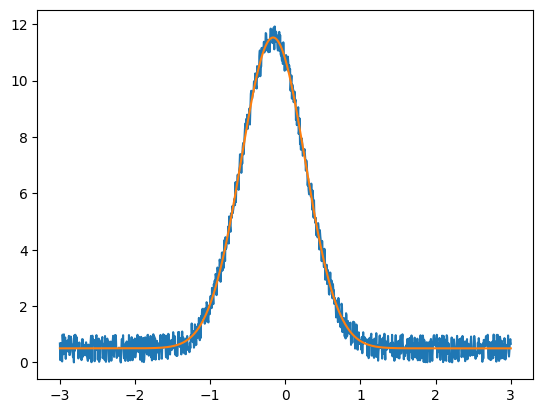

In [22]:
import matplotlib.pyplot as plt 
import numpy as np 
from Peakfit import Fitter 
def gaussnoise(x,centroid,A,FWHM,N):
    noise =np.random.random(len(x))*N
    sig = FWHM/(2*np.sqrt(2*np.log(2)))
    return A*np.exp(-((x-centroid)**2/(2*sig**2)))+noise
xstart =-3
xend  = 3 
xres = 1000
x = np.linspace(xstart,xend,xres)
centroid = -.162
A = 11
FWHM = 1.00
N =1
y =  gaussnoise(x,centroid,A,FWHM,N)
f = Fitter()

f.fit1d(x,y)

fig,ax = plt.subplots(1)
ax.plot(x,y)
args = f.getargs()
print('gotten arguments',np.asarray(args))
target = [centroid,FWHM,A,N/2]
print('target parameters',target )
fit = f.pltfunct(x)
ax.plot(x,fit)
plt.show()

Lorentz
Gauss
Gauss
Gauss


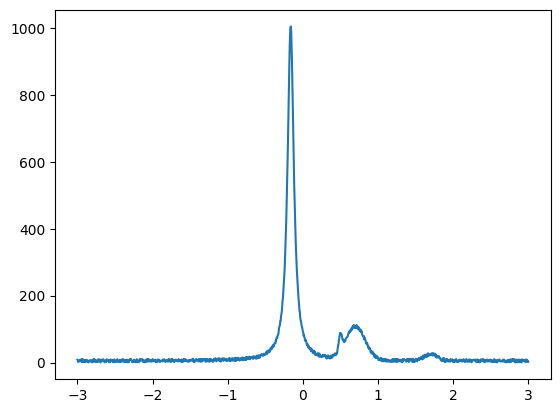

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from Peakfit import Fitter 
def multipeaknoise(x,centroids,As,FWHMs,N,types):
    sig = Fitter()
    sig.centroid=centroids
    sig.FWHM= FWHMs
    sig.A = As
    sig.fittype=types
    noise =np.random.random(len(x))*N
    signal = sig.pltfunct(x)
    return signal+noise



xstart =-3
xend  = 3
xres = 1201
x = np.linspace(xstart,xend,xres)
types =     ['Lorentz','Gauss','Gauss','Gauss']
centroids = [-.162  ,.5     ,.7     ,1.7]
As =        [1000   ,50     ,100    ,20]
FWHMs =     [.1     ,.05    ,.3     ,.20]
N =10
y =  multipeaknoise(x,centroids,As,FWHMs,N,types)
f = Fitter()

#f.fit1d(x,y)

fig,ax = plt.subplots(1)
ax.plot(x,y)
#args = f.getargs()
#print('gotten arguments',np.asarray(args))
#target = [centroid,FWHM,A,N/2]
#print('target parameters',target )
#fit = f.pltfunct(x)
#ax.plot(x,fit)
plt.show()